The purpose of this text is to gain deep understanding of deep learning which is what the current hype in machine learning is all about. We will start from the simplest common sense principles and move gradually towards more complex concepts without taking anything for granted. The idea is not to go through all possible models in machine learning but to take the shortest path to deep learning. However to gain better insights on some of the core concepts that the deep learning is built-on we need to start with simpler models.

Deep learning is used for classification but we'll start with prediction (linear regression) which is simpler. From prediction we'll move to the simplest form of classification called logistic regression. To tackle more demanding classification tasks we'll introduce neural networks and finally move to deep learning.

# Linear regression

Probably the simplest machine learning problem is trying to approximate a simple function, such as $y=wx$. Goal is to find the correct value of w based on a training set provided by the function that we are trying to approximate. In common machine learning terminology the function that we are trying to approximate is called the "target" $t(x)$ and the value we are trying to find is called the "weight" ($w$).

The function to approximate the target function is called the "hyphothesis" ($h(x)$). To be able to find the correct hyphothesis we need to know the form of the function we are trying to approximate: $h(x)=wx$. The only thing we don't know is the value $w$.

The basic idea is to use trial and error: start with some initial value of $w$ for the hyphothesis, and compare it's result to the correct value provided by the target.

For example let's set $t(x)=2x$, $h(x)=wx$, $w=0$, $x=1$. (It doesn't matter what values we choose for $w$ or $x$)

Let's test the hyphothesis: $h(x)=wx<=>0*1=0$  

The correct value would be: $t(x)=5x<=>2*1=2$

Now how can the computer come up with the correct value of w based on these results?

The machine needs to know direction and distance: $-(h(1)-t(1))=2$


In [17]:
def t(x):
    return 2*x

class H:
    w = 0
    def out(self, x):
        return self.w*x

h = H()    
print(h.out(1))

h.w =  - (h.out(1) - t(1))
print(h.out(1))

0
2


Now this is hardly machine learning. We can tackle this problem with machine learning but it is so simple that it is easy to tackle by conventional programming.

How about $h(x)=w_1+w_2x$ $t(x)=1+2x$

$h(1)=0+0*1=0$  
$t(1)=1+2*1=3$

Now we need to know how to adjust two variables and things get a lot more difficult. We know the form of the target function and the difference between the target and the current hyphothesis, but it is not obvious how we should adjust the variables to improve the hyphothesis.

There are multiple solutions, such as: $w_1=0,w_2=3$ or $w_1=3,w_2=0$ or $w_1=5,w_2=-2$

To get the correct solution we need another sample:
$t(2)=1+2*2=5$

All above solutions will fail when including $x=2$ sample.

This kind of testing is a bit complicated algorithm for finding the correct values. Luckily there is a quite simple algorithm which takes us to one of the fundamental methods of machine learning.

# Gradient descent

It's hard to know how much each variable w should be changed but it's quite easy to tell in which direction they should go. Derivation is a method for getting the slope of a function ie. the rate of change of a function. So if we take a derivative of the difference between h and t with respect to a given variable w we get the direction where to move: if derivative is negative we need to increase w, if it's positive we need to decrease w.

Lets describe function $l=h-t$ as the difference between h and t. The term difference is commonly replaced with terms loss or cost. We shall use the term loss from now on. To find the correct value of $w$ is to find the minimum of the loss function.

[36, 27, 18, 9, 0, 9, 18, 27, 36, 45, 54]


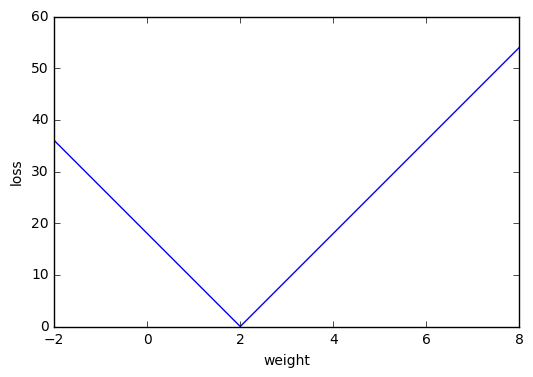

In [28]:
def t(x):
    return 2 * x

def h(w, x):
    return w * x

loss = []
values_of_w = list(range(-2,9))
for w in values_of_w:
    loss.append(abs(h(w,x) - t(x)))

print(loss)
plt.plot(values_of_w, loss)
plt.xlabel('weight')
plt.ylabel('loss')
plt.show()

Loss doesn't have to be the exact difference, it just needs to give some idea of how bad the hyphothesis is doing. For taking the derivative it's a bit simpler if we use the square of the difference instead of the absolute value of the difference:

$l=(h-t)^2$

~~$l$ can be described with any set of parameters depending on which parameters are considered constants and which are consider variables, for example: $l(w_1,w_2,y)$~~

For a loss function with multiple weights we cannot plot the loss in 2 dimensions, but the principle is the same. Instead of one derivative, we need to take derivatives separately for each value of $w$, this is called taking partial derivatives.

Partial derivative of l with respect to $w_1$ and $w_2$:

$l'_{w1}=2(h-t)h_{w1}'=2(h-t)$ 

$l'_{w2}=2(h-t)h_{w2}'=2(h-t)x$

Group of the partial derivatives is called the gradient:

$
\nabla{l}=
\begin{cases}
l'_{w1} \\
l'_{w2} \\
\end{cases}
$

We are using the gradient to minimize the loss function, hence the term **gradient descent**.

We are only actually interested whether the derivative is negative or not ie. whether we should increase or decrease the given weight. So we can just leave out the multiplying by 2.

[Gradient descent manually? then as an algorithm?]

In [41]:
def t(x):
    return 1 + 2 * x
    
def h(w1, w2, x):    
    return w1 + w2 * x;

def gradient(w, x):
    yh = h(w[0], w[1], x)
    y = t(x)
    w[0] = yh - y
    w[1] = (yh - y) * x
    return w

w = [0, 0]
print(gradient(w, 1))

[-3, -3]


Gradient tells us the loss function is pointing downwards with respect to both weight (both partial derivatives are negative). This means that in order to decrease the loss function we need to increase the weights. If the derivatives were positive we would need to decrease the weights.

How much should we increase the weights. If we pick too large value we might just end up over shooting back and forth around the minimum. If we pick small value gradient descent is slow, but we'll eventually get a good minimum. Perhaps $0.1$ is a safe amount of adjustment. We'll denote the amount of adjustment with $\alpha$ as is custom.

Let's use numpy library to make mathematics a bit easier.

[ 0.3  0.3] 5.76
[ 0.54  0.54] 3.6864
[ 0.732  0.732] 2.359296
[ 0.8856  0.8856] 1.50994944
[ 1.00848  1.00848] 0.9663676416
[ 1.106784  1.106784] 0.618475290624
[ 1.1854272  1.1854272] 0.395824185999
[ 1.24834176  1.24834176] 0.25332747904
[ 1.29867341  1.29867341] 0.162129586585
[ 1.33893873  1.33893873] 0.103762935415
[ 1.37115098  1.37115098] 0.0664082786654
[ 1.39692078  1.39692078] 0.0425012983458
[ 1.41753663  1.41753663] 0.0272008309413
[ 1.4340293  1.4340293] 0.0174085318025
[ 1.44722344  1.44722344] 0.0111414603536
[ 1.45777875  1.45777875] 0.00713053462628
[ 1.466223  1.466223] 0.00456354216082
[ 1.4729784  1.4729784] 0.00292066698293
[ 1.47838272  1.47838272] 0.00186922686907
[ 1.48270618  1.48270618] 0.00119630519621


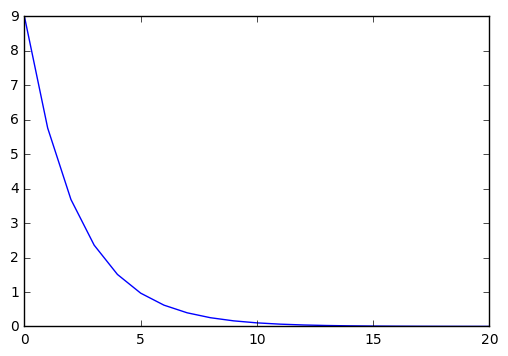

In [92]:
import numpy as np

def gradient(w, x):
    yh = h(w[0], w[1], x)
    y = t(x)
    w1 = yh - y
    w2 = (yh - y) * x
    return np.array([w1, w2])

def gradient_descent(w, x, alpha):
    return w - alpha * gradient(w, x) 

def loss(w, x):
    return (h(w[0], w[1], x) - t(x))**2

w = np.array([0,0])
x = 1
alpha = 0.1
iterations = range(0,20)
losses = [loss(w, x)]
for i in iterations:
    w = gradient_descent(w, x, alpha)
    l = loss(w, x)
    losses.append(l)
    print(w, l)
    
plt.plot(losses)
plt.show()

We get our loss low but the weights are different from the target. That's because our sample value of 1 is not very good for testing this function. If we set $x=2$ we get a lot better approximation.

Actually this depends a lot on which sample we choose.

## Testing with different values

x:  2
alpha:  0.1
iterations:  5
w:  [ 0.96875  1.9375 ]


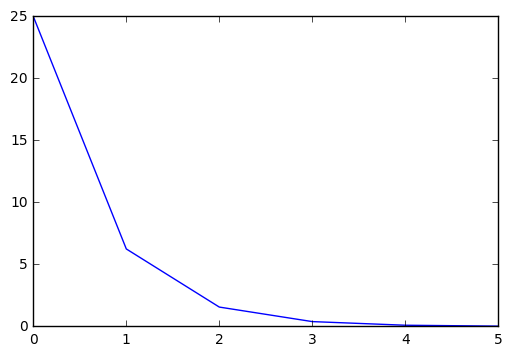

x:  3
alpha:  0.1
iterations:  5
w:  [ 0.7  2.1]


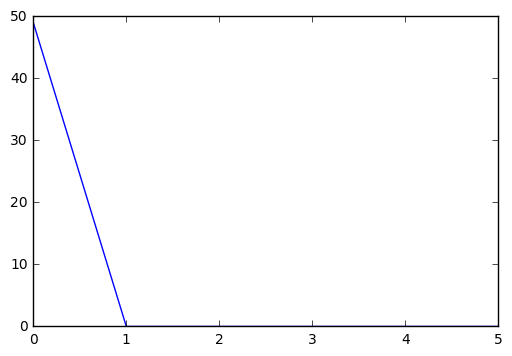

x:  5
alpha:  0.07
iterations:  15
w:  [ 0.44463585  2.22317925]


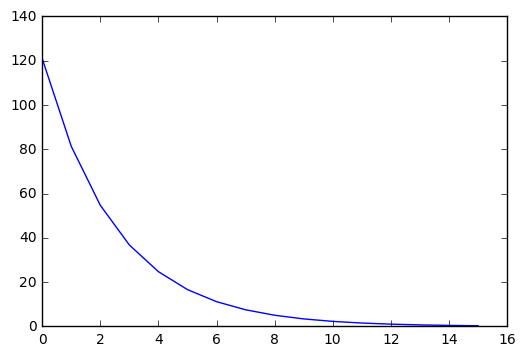

x:  10
alpha:  0.01
iterations:  5
w:  [ 0.20792079  2.07920792]


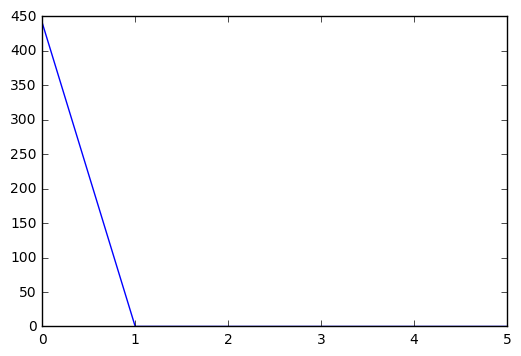

In [122]:
def train(w, x, alpha, iterations):
    losses = [loss(w, x)]
    for i in range(0, iterations):
        w = gradient_descent(w, x, alpha)
        l = loss(w, x)
        losses.append(l)
    print('x: ', x)    
    print('alpha: ', alpha)    
    print('iterations: ', iterations)
    print('w: ', w)
    plt.plot(losses)
    plt.show()

w = np.array([0,0])
x = 2
alpha = 0.1
iterations = 5
train(w, x, alpha, iterations)
train(w, 3, alpha, iterations)
train(w, 5, 0.07, 15)
train(w, 10, 0.01, 5)

## Sample size over one

$m=[\text{sample size}]$

$\displaystyle l=\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)^2$

$\displaystyle l'_w=\frac{2}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_i$ 

for $w_1$ (which is by itself) we can think of x as 1, so we don't need to write a separate formula for it.

x:  [[ 0]
 [ 3]
 [ 4]
 [ 0]
 [-5]
 [-5]
 [-4]
 [ 2]
 [ 1]
 [ 4]]
alpha:  0.1
iterations:  30
w:  [ 0.95760884  2.        ]


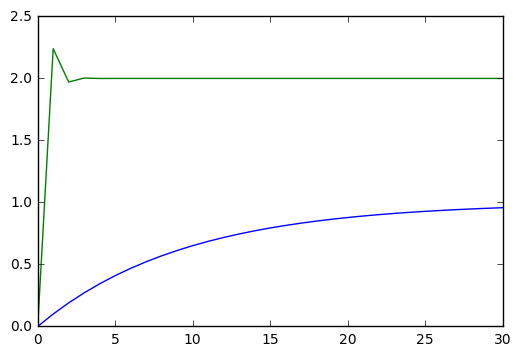

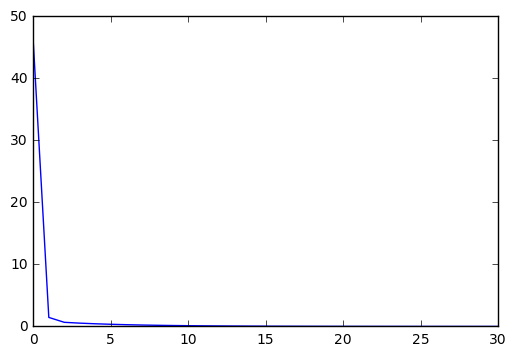

In [163]:
#def h(w1, w2, x):    
#    return w1 + w2 * x;

def gradient(w, x):
    yh = h(w[0], w[1], x)
    y = t(x)
    m = x.shape[0]
    w1 = np.sum(yh - y) / m
    w2 = np.sum((yh - y) * x) / m
    return np.array([w1, w2])

#def gradient_descent(w, x, alpha):
#    return w - alpha * gradient(w, x) 

def loss(w, x):
    m = x.shape[0]
    return np.sum((h(w[0], w[1], x) - t(x))**2) / m

def train(w, x, alpha, iterations):
    losses = [loss(w, x)]
    ws = [np.zeros(2)]
    for i in range(0, iterations):
        w = gradient_descent(w, x, alpha)
        ws.append(w)
        l = loss(w, x)
        losses.append(l)
    print('x: ', x)    
    print('alpha: ', alpha)    
    print('iterations: ', iterations)
    print('w: ', w)
    #print(ws)
    plt.plot(ws)
    plt.show()
    plt.plot(losses)
    plt.show()

m = 10 # number of training samples  
n = 1 # number of features
np.random.seed(1)
x = np.random.randint(-5, 6, (m,n))
#print(x)
#x = np.insert(x, 0, 1, axis=1)
#print(x)
w = np.array([0,0])
alpha = 0.1
iterations = 30
train(w, x, alpha, iterations)
#train(w, 3, alpha, iterations)
#train(w, 5, 0.07, 15)
#train(w, 10, 0.01, 5)

We quickly find correct value for the $w_2$ because that is the most meaningful weight. The loss also get low quickly despite $w_1$ being off.

Again this got too large, try to summarize... introduce linear algebra immediately.

What if instead of having a smooth straight line as a target, we would have a bunch of samples that won't fall exactly on a straight line.

[0.5816709779853464, 2.3724946906206923, 2.7042571729383504, 7.10118630301014, 8.991007993635424, 8.878527575007519, 11.856950172321444, 12.801592635845147, 15.65629416254197, 16.61259522093215]


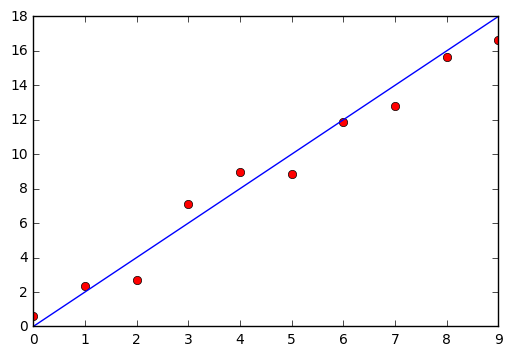

In [15]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def t(x):
    return 2 * x

samples = []
approximation = []
random.seed(65767)
for x in range(0,10):
    samples.append(t(x) + random.uniform(-2,2))
    approximation.append(t(x))
    
print(samples)    

plt.plot(samples, 'ro')
plt.plot(approximation)
plt.show()

mathematical approach?

When learning new things you would like to start with a simple example. The problem with machine learning is that it is meant for hard problems. To really see machine learning in action you need complex examples.

To see why machine learning is useful we start from simple problems and gradually move towards more complex problems by using conventional programming to solve problems. Eventually we'll arrive into such problem where machine learning will actually be the simplest and most efficient method for solving the problem.

or is a + bx already hard enough?



# Logistic regression

# Neural networks

# Deep learning